# Final Paper

##### Kimberly Liu & Isaac Tabor

# Project Results

**Clear Prediction Question:** What are the most likely 2025 March Madness outcomes according to our XGBoost model?



Start by cloning the repository and adjusting file path as necessary.

In [1]:
! git clone https://github.com/kimberlyyliuu/DS3001-Project

fatal: destination path 'DS3001-Project' already exists and is not an empty directory.


In [2]:
cd /content/DS3001-Project/data

/content/DS3001-Project/data


**Importing Data**

In [3]:
import numpy as np
import pandas as pd
"""#Section 1 """
# MTeams_df = pd.read_csv("/Users/kimberlyliu/Downloads/DS 3001/DS3001-Project/data/MTeams.csv")
# cd /content/DS3001-Project/data
MTeams_df = pd.read_csv("MTeams.csv")

# MSeasons_df = pd.read_csv("/Users/kimberlyliu/Downloads/DS 3001/DS3001-Project/data/MSeasons.csv")
MSeasons_df = pd.read_csv("/content/DS3001-Project/data/MSeasons.csv")

# MTourneySeeds_df = pd.read_csv("/Users/kimberlyliu/Downloads/DS 3001/DS3001-Project/data/MNCAATourneySeeds.csv")
# MTourneySeeds_df = pd.read_csv("/content/DS3001-Project/data/MNCAATourneySeeds.csv")

# MRegularSeasonCompactResults_df = pd.read_csv("/Users/kimberlyliu/Downloads/DS 3001/DS3001-Project/data/MRegularSeasonCompactResults.csv")
MRegularSeasonCompactResults_df = pd.read_csv("/content/DS3001-Project/data/MRegularSeasonCompactResults.csv")

""" ## Section 2 """
# MRegularSeasonDetailedResults_df =  pd.read_csv("/Users/kimberlyliu/Downloads/DS 3001/DS3001-Project/data/MRegularSeasonDetailedResults.csv")
MRegularSeasonDetailedResults_df =  pd.read_csv("/content/DS3001-Project/data/MRegularSeasonDetailedResults.csv")

# MNCAATourneyDetailedResults_df =   pd.read_csv("/Users/kimberlyliu/Downloads/DS 3001/DS3001-Project/data/MNCAATourneyDetailedResults.csv")
MNCAATourneyDetailedResults_df =   pd.read_csv("/content/DS3001-Project/data/MNCAATourneyDetailedResults.csv")

# MTeamConferences_df =pd.read_csv("/Users/kimberlyliu/Downloads/DS 3001/DS3001-Project/data/MTeamConferences.csv")
MTeamConferences_df =pd.read_csv("/content/DS3001-Project/data/MTeamConferences.csv")

# MGameCities_df = pd.read_csv("/Users/kimberlyliu/Downloads/DS 3001/DS3001-Project/data/MGameCities.csv")
MGameCities_df = pd.read_csv("/content/DS3001-Project/data/MGameCities.csv")

#MConferenceTourneyGames_df = pd.read_csv("/Users/kimberlyliu/Downloads/DS 3001/DS3001-Project/data/MConferenceTourneyGames.csv")
MConferenceTourneyGames_df = pd.read_csv("/content/DS3001-Project/data/MConferenceTourneyGames.csv")

# df = pd.read_csv("/Users/kimberlyliu/Downloads/DS 3001/DS3001-Project/data/MMasseyOrdinals.csv")
df = pd.read_csv("/content/DS3001-Project/data/MMasseyOrdinals.csv")

# MNCAATourneySlots_df = pd.read_csv("/Users/kimberlyliu/Downloads/DS 3001/DS3001-Project/data/MNCAATourneySlots.csv")
MNCAATourneySlots_df = pd.read_csv("/content/DS3001-Project/data/MNCAATourneySlots.csv")



In [4]:
"""## Drop Teams that have not been D1 since 2003 """
MTeams_df = MTeams_df[MTeams_df['LastD1Season'] >= 2003]

# Showing older games to newest games
MRegularSeasonDetailedResults_df.sort_values(by=['Season', 'DayNum'], ascending=[True, True])


""" Add Team Name for Win and Lose """
MRegularSeasonDetailedResults_df['WTeamName'] = MRegularSeasonDetailedResults_df['WTeamID'].map(MTeams_df.set_index('TeamID')['TeamName'])
MRegularSeasonDetailedResults_df['LTeamName'] = MRegularSeasonDetailedResults_df['LTeamID'].map(MTeams_df.set_index('TeamID')['TeamName'])

""" add game type and city id """
merged_df = MRegularSeasonDetailedResults_df.merge(
    MGameCities_df[['Season', 'DayNum', 'WTeamID', 'LTeamID', 'CRType', 'CityID']],
    on=['Season', 'DayNum', 'WTeamID', 'LTeamID'],
    how='left'
)

print(merged_df.info())
merged_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117748 entries, 0 to 117747
Data columns (total 38 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Season     117748 non-null  int64  
 1   DayNum     117748 non-null  int64  
 2   WTeamID    117748 non-null  int64  
 3   WScore     117748 non-null  int64  
 4   LTeamID    117748 non-null  int64  
 5   LScore     117748 non-null  int64  
 6   WLoc       117748 non-null  object 
 7   NumOT      117748 non-null  int64  
 8   WFGM       117748 non-null  int64  
 9   WFGA       117748 non-null  int64  
 10  WFGM3      117748 non-null  int64  
 11  WFGA3      117748 non-null  int64  
 12  WFTM       117748 non-null  int64  
 13  WFTA       117748 non-null  int64  
 14  WOR        117748 non-null  int64  
 15  WDR        117748 non-null  int64  
 16  WAst       117748 non-null  int64  
 17  WTO        117748 non-null  int64  
 18  WStl       117748 non-null  int64  
 19  WBlk       117748 non-n

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LDR,LAst,LTO,LStl,LBlk,LPF,WTeamName,LTeamName,CRType,CityID
0,2003,10,1104,68,1328,62,N,0,27,58,...,22,8,18,9,2,20,Alabama,Oklahoma,NaN,NaN
1,2003,10,1272,70,1393,63,N,0,26,62,...,25,7,12,8,6,16,Memphis,Syracuse,NaN,NaN
2,2003,11,1266,73,1437,61,N,0,24,58,...,22,9,12,2,5,23,Marquette,Villanova,NaN,NaN
3,2003,11,1296,56,1457,50,N,0,18,38,...,20,9,19,4,3,23,N Illinois,Winthrop,NaN,NaN
4,2003,11,1400,77,1208,71,N,0,30,61,...,15,12,10,7,1,14,Texas,Georgia,NaN,NaN


In [5]:
# Add conferences of winning and losing teams.

""" Merge to bring in the conference abbreviation as ConfAbbrev """
merged_df = merged_df.merge(
    MTeamConferences_df[['Season', 'TeamID', 'ConfAbbrev']],
    left_on=['Season', 'WTeamID'],
    right_on=['Season', 'TeamID'],
    how='left'
)

""" Rename the imported column to WConf and drop the duplicate TeamID column from the merge"""
merged_df.rename(columns={'ConfAbbrev': 'WConf'}, inplace=True)
merged_df.drop(columns=['TeamID'], inplace=True)


""" Merge to bring in the conference abbreviation as ConfAbbrev"""
merged_df = merged_df.merge(
    MTeamConferences_df[['Season', 'TeamID', 'ConfAbbrev']],
    left_on=['Season', 'LTeamID'],
    right_on=['Season', 'TeamID'],
    how='left'
)

merged_df.rename(columns={'ConfAbbrev': 'LConf'}, inplace=True)
merged_df.drop(columns=['TeamID'], inplace=True)

print(len(merged_df))
merged_df.head()

117748


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LTO,LStl,LBlk,LPF,WTeamName,LTeamName,CRType,CityID,WConf,LConf
0,2003,10,1104,68,1328,62,N,0,27,58,...,18,9,2,20,Alabama,Oklahoma,NaN,NaN,sec,big_twelve
1,2003,10,1272,70,1393,63,N,0,26,62,...,12,8,6,16,Memphis,Syracuse,NaN,NaN,cusa,big_east
2,2003,11,1266,73,1437,61,N,0,24,58,...,12,2,5,23,Marquette,Villanova,NaN,NaN,cusa,big_east
3,2003,11,1296,56,1457,50,N,0,18,38,...,19,4,3,23,N Illinois,Winthrop,NaN,NaN,mac,big_south
4,2003,11,1400,77,1208,71,N,0,30,61,...,10,7,1,14,Texas,Georgia,NaN,NaN,big_twelve,sec


Above we have data at the game-level unit of observation.

Below, we aggregate the data to the season-level for each team.

First, we format the game-level data to a new unit of observation such that there is 1 row for each team's game win or loss. For example, before UVA versus Duke Feb 9, 2019 had one row. Now, it has 2 rows, one for UVA documenting the loss and one for Duke documenting the win.

Then, this data can be aggregated for season-level data for each team.

In [6]:
# Team Season Aggregations

df = merged_df.copy()  # Work on a copy to avoid modifying the original data

# Create a version where each row represents the winning team
df_wins = df.copy()
df_wins["TeamID"] = df_wins["WTeamID"]
df_wins["OpponentID"] = df_wins["LTeamID"]
df_wins["ScoreDiff"] = df_wins["WScore"] - df_wins["LScore"]  # Positive = win margin
df_wins["Win"] = 1  # Mark as a win
df_wins["GameResult"] = "W"

# Create a version where each row represents the losing team
df_losses = df.copy()
df_losses["TeamID"] = df_losses["LTeamID"]
df_losses["OpponentID"] = df_losses["WTeamID"]
df_losses["ScoreDiff"] = df_losses["LScore"] - df_losses["WScore"]  # Negative = loss margin
df_losses["Win"] = 0  # Mark as a loss
df_losses["GameResult"] = "L"

# Combine both win and loss versions into one dataset
df_team_games = pd.concat([df_wins, df_losses])

# Aggregate stats for each team per season
team_season_agg = (
    df_team_games.groupby(["Season", "TeamID"])
    .agg(
        AvgScoreDiff=("ScoreDiff", "mean"),    # Average point difference
        MedianScoreDiff=("ScoreDiff", "median"),
        MinScoreDiff=("ScoreDiff", "min"),
        MaxScoreDiff=("ScoreDiff", "max"),
        Wins=("Win", "sum"),                   # Total wins
        Losses=("GameResult", lambda x: (x == "L").sum()),  # Count losses
        WinPercentage=("Win", "mean"),         # Win rate
        AvgFGM=("WFGM", "mean"),               # Field goals made per game
        AvgFGA=("WFGA", "mean"),               # Field goals attempted per game
        AvgFGPerc=("WFGM", lambda x: x.sum() / x.count()),  # Shooting percentage
        Avg3PM=("WFGM3", "mean"),              # 3-pointers made per game
        Avg3PA=("WFGA3", "mean"),              # 3-pointers attempted per game
        AvgFTM=("WFTM", "mean"),               # Free throws made per game
        AvgFTA=("WFTA", "mean"),               # Free throws attempted per game
        AvgRebounds=("WOR", "mean"),           # Offensive rebounds
        AvgDefRebounds=("WDR", "mean"),        # Defensive rebounds
        AvgAssists=("WAst", "mean"),           # Assists
        AvgTurnovers=("WTO", "mean"),          # Turnovers
        AvgSteals=("WStl", "mean"),            # Steals
        AvgBlocks=("WBlk", "mean"),            # Blocks
        AvgFouls=("WPF", "mean"),              # Fouls committed
    )
    .reset_index()
)

team_season_agg.head() # Preview the aggregated data


,Season,TeamID,AvgScoreDiff,MedianScoreDiff,MinScoreDiff,MaxScoreDiff,Wins,Losses,WinPercentage,AvgFGM,...,Avg3PA,AvgFTM,AvgFTA,AvgRebounds,AvgDefRebounds,AvgAssists,AvgTurnovers,AvgSteals,AvgBlocks,AvgFouls
0,2003,1102,0.250000,-3.0,-32,38,12,16,0.428571,20.821429,...,15.607143,15.035714,21.928571,6.714286,20.714286,13.107143,11.642857,6.035714,2.392857,16.571429
1,2003,1103,0.629630,-2.0,-16,33,13,14,0.481481,28.962963,...,15.481481,18.518519,25.851852,10.111111,22.703704,17.407407,13.666667,6.814815,2.555556,20.222222
2,2003,1104,4.285714,6.0,-19,28,17,11,0.607143,25.500000,...,19.821429,15.071429,21.250000,12.285714,24.785714,13.607143,12.607143,6.785714,4.178571,16.964286
3,2003,1105,-4.884615,-3.5,-42,34,7,19,0.269231,27.692308,...,18.884615,17.230769,25.076923,13.576923,27.000000,16.730769,17.730769,10.500000,3.653846,18.923077
4,2003,1106,-0.142857,-1.0,-26,26,13,15,0.464286,24.500000,...,16.107143,13.928571,20.821429,11.928571,26.250000,13.535714,15.892857,9.107143,3.785714,16.250000


Below, we add the seeds to the NCAA tournament games to the NCAA Tourney Data that contains the data with the game-level unit of observation.

In [7]:
# 1a) Load the seeds

seeds = pd.read_csv("MNCAATourneySeeds.csv")
# seeds has columns: Season, Seed (like "W01"), TeamID

# 1b) Pull out just the numeric part of the seed
seeds["SeedNum"] = seeds["Seed"].str.extract(r"(\d+)").astype(int)

# 1c) Merge for winners
seeded_tourney_games = MNCAATourneyDetailedResults_df.merge(
    seeds.rename(columns={
      "TeamID":"WTeamID",
      "Seed":"WSeed",
      "SeedNum":"WSeedNum"
    }),
    on=["Season","WTeamID"],
    how="left"
)

# 1d) Merge for losers
seeded_tourney_games = seeded_tourney_games.merge(
    seeds.rename(columns={
      "TeamID":"LTeamID",
      "Seed":"LSeed",
      "SeedNum":"LSeedNum"
    }),
    on=["Season","LTeamID"],
    how="left"
)


In [8]:
seeds.tail()

,Season,Seed,TeamID,SeedNum
2621,2025,Z12,1161,12
2622,2025,Z13,1213,13
2623,2025,Z14,1423,14
2624,2025,Z15,1303,15
2625,2025,Z16,1313,16


In [9]:
df = df_team_games.copy()

# bring in team stats
df = df.merge(
    team_season_agg,
    on=["Season","TeamID"],
    how="left"
)
# bring in opponent stats (suffix _opp)
df = df.merge(
    team_season_agg.add_suffix("_opp"),
    left_on=["Season","OpponentID"],
    right_on=["Season_opp","TeamID_opp"],
    how="left"
)

# 2) (Re-)merge seeds & location
# — seeds already in `seeds` from before with merged_df
df = df.merge(
    seeds.rename(columns={"TeamID":"TeamID","SeedNum":"SeedNum"}),
    on=["Season","TeamID"], how="left"
).rename(columns={"SeedNum":"SeedNum"})
df = df.merge(
    seeds.rename(columns={"TeamID":"OpponentID","SeedNum":"SeedNum"}),
    on=["Season","OpponentID"], how="left"
).rename(columns={"SeedNum":"SeedNum_opp"})


df = df.rename(columns={
    "SeedNum_x": "SeedNum",
    "SeedNum_y": "SeedNum_opp"
}).drop(columns=["Seed_x", "Seed_y"])

print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235496 entries, 0 to 235495
Data columns (total 91 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Season               235496 non-null  int64  
 1   DayNum               235496 non-null  int64  
 2   WTeamID              235496 non-null  int64  
 3   WScore               235496 non-null  int64  
 4   LTeamID              235496 non-null  int64  
 5   LScore               235496 non-null  int64  
 6   WLoc                 235496 non-null  object 
 7   NumOT                235496 non-null  int64  
 8   WFGM                 235496 non-null  int64  
 9   WFGA                 235496 non-null  int64  
 10  WFGM3                235496 non-null  int64  
 11  WFGA3                235496 non-null  int64  
 12  WFTM                 235496 non-null  int64  
 13  WFTA                 235496 non-null  int64  
 14  WOR                  235496 non-null  int64  
 15  WDR              

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,AvgFTA_opp,AvgRebounds_opp,AvgDefRebounds_opp,AvgAssists_opp,AvgTurnovers_opp,AvgSteals_opp,AvgBlocks_opp,AvgFouls_opp,SeedNum,SeedNum_opp
0,2003,10,1104,68,1328,62,N,0,27,58,...,19.033333,11.900000,25.533333,14.500000,11.700000,6.833333,3.700000,18.300000,10.0,1.0
1,2003,10,1272,70,1393,63,N,0,26,62,...,23.310345,13.896552,27.413793,16.241379,13.344828,8.413793,6.793103,17.137931,7.0,3.0
2,2003,11,1266,73,1437,61,N,0,24,58,...,26.600000,13.266667,25.066667,14.633333,16.366667,7.666667,4.066667,19.066667,3.0,NaN
3,2003,11,1296,56,1457,50,N,0,18,38,...,24.000000,11.785714,25.964286,13.214286,14.500000,7.571429,4.535714,18.285714,NaN,NaN
4,2003,11,1400,77,1208,71,N,0,30,61,...,23.037037,12.851852,25.888889,17.666667,11.962963,7.185185,4.703704,16.555556,1.0,NaN


In [10]:
seeded_tourney_games.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LDR,LAst,LTO,LStl,LBlk,LPF,WSeed,WSeedNum,LSeed,LSeedNum
0,2003,134,1421,92,1411,84,N,1,32,69,...,28,16,15,5,0,22,X16b,16,X16a,16
1,2003,136,1112,80,1436,51,N,0,31,66,...,26,12,17,10,3,15,Z01,1,Z16,16
2,2003,136,1113,84,1272,71,N,0,31,59,...,22,11,12,2,5,18,Z10,10,Z07,7
3,2003,136,1141,79,1166,73,N,0,29,53,...,17,20,21,6,6,21,Z11,11,Z06,6
4,2003,136,1143,76,1301,74,N,1,27,64,...,26,16,14,5,8,19,W08,8,W09,9


In [11]:
seeded_tourney_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1382 entries, 0 to 1381
Data columns (total 38 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Season    1382 non-null   int64 
 1   DayNum    1382 non-null   int64 
 2   WTeamID   1382 non-null   int64 
 3   WScore    1382 non-null   int64 
 4   LTeamID   1382 non-null   int64 
 5   LScore    1382 non-null   int64 
 6   WLoc      1382 non-null   object
 7   NumOT     1382 non-null   int64 
 8   WFGM      1382 non-null   int64 
 9   WFGA      1382 non-null   int64 
 10  WFGM3     1382 non-null   int64 
 11  WFGA3     1382 non-null   int64 
 12  WFTM      1382 non-null   int64 
 13  WFTA      1382 non-null   int64 
 14  WOR       1382 non-null   int64 
 15  WDR       1382 non-null   int64 
 16  WAst      1382 non-null   int64 
 17  WTO       1382 non-null   int64 
 18  WStl      1382 non-null   int64 
 19  WBlk      1382 non-null   int64 
 20  WPF       1382 non-null   int64 
 21  LFGM      1382

In [12]:
# Add Game Result column to tourney data
df_team_tourney_results = pd.concat(
    [
        seeded_tourney_games[
            ["Season", "WTeamID", "LTeamID", "WScore", "LScore",'WSeedNum','LSeedNum']
        ]
        .assign(GameResult="W")
        .rename(
            columns={
                "WTeamID": "TeamID",
                "LTeamID": "OppTeamID",
                "WScore": "TeamScore",
                "LScore": "OppScore",
                'WSeedNum':'SeedNum',
                'LSeedNum':'OppSeedNum'
            }
        ),
        seeded_tourney_games[
            ["Season", "LTeamID", "WTeamID", "LScore", "WScore"]
        ]
        .assign(GameResult="L")
        .rename(
            columns={
                "LTeamID": "TeamID",
                "WTeamID": "OppTeamID",
                "LScore": "TeamScore",
                "WScore": "OppScore",
                'LSeedNum':'SeedNum',
                'WSeedNum':'OppSeedNum'
            }
        ),
    ]
).reset_index(drop=True)

df_team_tourney_results["Win"] = (df_team_tourney_results["GameResult"] == "W").astype(
    "int"
)


In [13]:
df_team_tourney_results.head()

,Season,TeamID,OppTeamID,TeamScore,OppScore,SeedNum,OppSeedNum,GameResult,Win
0,2003,1421,1411,92,84,16.0,16.0,W,1
1,2003,1112,1436,80,51,1.0,16.0,W,1
2,2003,1113,1272,84,71,10.0,7.0,W,1
3,2003,1141,1166,79,73,11.0,6.0,W,1
4,2003,1143,1301,76,74,8.0,9.0,W,1


In [14]:
final_df = df_team_tourney_results.merge(
    team_season_agg[
        ['Season','TeamID','AvgScoreDiff','MedianScoreDiff','WinPercentage', 'AvgFGM', 'AvgFGA', 'AvgFGPerc', 'Avg3PM', 'Avg3PA', 'AvgFTM', 'AvgFTA', 'AvgRebounds', 'AvgDefRebounds', 'AvgAssists', 'AvgTurnovers', 'AvgSteals', 'AvgBlocks', 'AvgFouls'
]
    ],
    on=["Season", 'TeamID'],
    how="left",
).merge(
    team_season_agg[
        ['Season','TeamID','AvgScoreDiff','MedianScoreDiff','WinPercentage', 'AvgFGM', 'AvgFGA', 'AvgFGPerc', 'Avg3PM', 'Avg3PA', 'AvgFTM', 'AvgFTA', 'AvgRebounds', 'AvgDefRebounds', 'AvgAssists', 'AvgTurnovers', 'AvgSteals', 'AvgBlocks', 'AvgFouls'
]
    ].rename(
    columns={
        "TeamID": "OppTeamID",
        "AvgScoreDiff": "OppAvgScoreDiff",
        "MedianScoreDiff": "OppMedianScoreDiff",
        "WinPercentage": "OppWinPercentage",
        "AvgFGM": "OppAvgFGM",
        "AvgFGA": "OppAvgFGA",
        "AvgFGPerc": "OppAvgFGPerc",
        "Avg3PM": "OppAvg3PM",
        "Avg3PA": "OppAvg3PA",
        "AvgFTM": "OppAvgFTM",
        "AvgFTA": "OppAvgFTA",
        "AvgRebounds": "OppAvgRebounds",
        "AvgDefRebounds": "OppAvgDefRebounds",
        "AvgAssists": "OppAvgAssists",
        "AvgTurnovers": "OppAvgTurnovers",
        "AvgSteals": "OppAvgSteals",
        "AvgBlocks": "OppAvgBlocks",
        "AvgFouls": "OppAvgFouls",
    }
)
,
    on=["Season", "OppTeamID"],
)

In [29]:
print(final_df.info())
final_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2764 entries, 0 to 2763
Data columns (total 43 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Season              2764 non-null   int64  
 1   TeamID              2764 non-null   int64  
 2   OppTeamID           2764 non-null   int64  
 3   TeamScore           2764 non-null   int64  
 4   OppScore            2764 non-null   int64  
 5   SeedNum             1382 non-null   float64
 6   OppSeedNum          1382 non-null   float64
 7   GameResult          2764 non-null   object 
 8   Win                 2764 non-null   int64  
 9   AvgScoreDiff        2764 non-null   float64
 10  MedianScoreDiff     2764 non-null   float64
 11  WinPercentage       2764 non-null   float64
 12  AvgFGM              2764 non-null   float64
 13  AvgFGA              2764 non-null   float64
 14  AvgFGPerc           2764 non-null   float64
 15  Avg3PM              2764 non-null   float64
 16  Avg3PA

,Season,TeamID,OppTeamID,TeamScore,OppScore,SeedNum,OppSeedNum,GameResult,Win,AvgScoreDiff,...,OppAvg3PA,OppAvgFTM,OppAvgFTA,OppAvgRebounds,OppAvgDefRebounds,OppAvgAssists,OppAvgTurnovers,OppAvgSteals,OppAvgBlocks,OppAvgFouls
0,2003,1421,1411,92,84,16.0,16.0,W,1,-7.241379,...,19.033333,16.900000,26.100000,11.033333,26.533333,15.433333,15.833333,6.366667,2.733333,18.433333
1,2003,1112,1436,80,51,1.0,16.0,W,1,14.964286,...,16.379310,13.931034,20.137931,12.413793,26.620690,15.689655,13.344828,7.551724,4.000000,15.413793
2,2003,1113,1272,84,71,10.0,7.0,W,1,6.793103,...,19.241379,15.310345,23.103448,13.793103,26.586207,17.172414,13.931034,7.206897,4.758621,18.586207
3,2003,1141,1166,79,73,11.0,6.0,W,1,6.103448,...,19.575758,14.333333,20.727273,10.939394,23.606061,17.363636,13.181818,8.545455,4.515152,17.060606
4,2003,1143,1301,76,74,8.0,9.0,W,1,4.724138,...,19.566667,18.233333,23.866667,9.966667,23.600000,15.733333,13.500000,8.300000,3.666667,17.333333


In [45]:

# feature_cols = [c for c in final_df.columns if c not in ['Season',	'TeamID','OppTeamID',	'TeamScore',	'OppScore',	'SeedNum',	'OppSeedNum',	'GameResult','Win']]
feature_cols = final_df.columns[9:26]
X = pd.DataFrame({
    f"{c}_diff": final_df[c] - final_df[f"Opp{c}"]
    for c in feature_cols
})

In [47]:
from sklearn.metrics import log_loss, accuracy_score, roc_auc_score, confusion_matrix
from xgboost import XGBClassifier

y = final_df["Win"]

# 4) Drop rows with any NaNs
mask = X.notna().all(axis=1)
X, y = X[mask], y[mask]

# 5) Train/test split by season
seasons = final_df.loc[mask, "Season"] # this is a df of just the Seasons column of rows that have no NaNs.
train_mask = seasons < 2023 # Training on seasons prior to 2023.
X_train, X_test = X[train_mask], X[~train_mask]
y_train, y_test = y[train_mask], y[~train_mask]

# 6) Fit & evaluate
model = XGBClassifier(use_label_encoder=False, eval_metric="logloss")
model.fit(X_train, y_train)

p_test = model.predict_proba(X_test)[:,1]
print("Log loss:   ", log_loss(y_test, p_test))
print("Accuracy:   ", accuracy_score(y_test, p_test>0.5))
print("ROC AUC:    ", roc_auc_score(y_test, p_test))
print("Confusion:\n", confusion_matrix(y_test, p_test>0.5))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:53:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Log loss:    0.8008175573509837
Accuracy:    0.5671641791044776
ROC AUC:     0.6548785921140566
Confusion:
 [[75 59]
 [57 77]]


In [50]:
predictions_df = pd.DataFrame({
    "y_true": y_test,
    "y_pred_prob": p_test,
    "y_pred_label": (p_test > 0.5).astype(int)
})
predictions_df

,y_true,y_pred_prob,y_pred_label
1248,1,0.666499,1
1249,1,0.817269,1
1250,1,0.427818,0
1251,1,0.846602,1
1252,1,0.988098,1
...,...,...,...
2759,0,0.903203,1
2760,0,0.174893,0
2761,0,0.065962,0
2762,0,0.123463,0


In [52]:
from sklearn.model_selection import GroupKFold
import xgboost as xgb


groups = final_df["Season"]
seasons = final_df["Season"].unique()

# Setup cross-validation
gkf = GroupKFold(n_splits=final_df["Season"].nunique())
cv_results = []
models = []

season_idx = 0
for train_index, test_index in gkf.split(X, y, groups):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  # Prepare the model
  model = xgb.XGBRegressor(eval_metric="logloss", n_estimators=1_000, learning_rate=0.001,)
  holdout_season = seasons[season_idx]
  print(f"Holdout Season: {holdout_season}")

  # Train the model
  model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=100)

  # Predict on the test set
  y_pred = model.predict(X_test)
  score_ll = log_loss(y_test, y_pred)
  y_pred = y_pred > 0.5
  # Evaluate the model
  accuracy = accuracy_score(y_test, y_pred)
  cv_results.append(accuracy)
  season_idx += 1
  print(f"Season {holdout_season}: {accuracy} {score_ll}")
  models.append(model)

# Print the average accuracy across all folds
print("Average CV Accuracy:", np.mean(cv_results))

Holdout Season: 2003
[0]	validation_0-logloss:0.69289
[100]	validation_0-logloss:0.67302
[200]	validation_0-logloss:0.65780
[300]	validation_0-logloss:0.64516
[400]	validation_0-logloss:0.63567
[500]	validation_0-logloss:0.62855
[600]	validation_0-logloss:0.62262
[700]	validation_0-logloss:0.61760
[800]	validation_0-logloss:0.61241
[900]	validation_0-logloss:0.60944
[999]	validation_0-logloss:0.60644
Season 2003: 0.6865671641791045 0.60643911540291
Holdout Season: 2004
[0]	validation_0-logloss:0.69298
[100]	validation_0-logloss:0.67853
[200]	validation_0-logloss:0.66742
[300]	validation_0-logloss:0.65943
[400]	validation_0-logloss:0.65181
[500]	validation_0-logloss:0.64574
[600]	validation_0-logloss:0.64112
[700]	validation_0-logloss:0.63651
[800]	validation_0-logloss:0.63286
[900]	validation_0-logloss:0.63028
[999]	validation_0-logloss:0.62757
Season 2004: 0.6343283582089553 0.6275729776130302
Holdout Season: 2005
[0]	validation_0-logloss:0.69305
[100]	validation_0-logloss:0.68236
[20

In [ ]:
# Checking for overfititng

# on train set
p_train = model.predict_proba(X_train)[:,1]
print("Train logloss:", log_loss(y_train, p_train))
print("Train ROC AUC:", roc_auc_score(y_train, p_train))


Train logloss: 0.3492209721462712
Train ROC AUC: 0.9467552129583772


In [ ]:
model = XGBClassifier(
    eval_metric="logloss",
    use_label_encoder=False,
    n_estimators=1000,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
)
model.fit(
    X_train, y_train,
    eval_set=[(X_test,y_test)],
    verbose=10
)


[0]	validation_0-logloss:0.68500
[10]	validation_0-logloss:0.63588
[20]	validation_0-logloss:0.61475
[30]	validation_0-logloss:0.60501
[40]	validation_0-logloss:0.59898
[50]	validation_0-logloss:0.59710
[60]	validation_0-logloss:0.59593
[70]	validation_0-logloss:0.59508


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:56:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[80]	validation_0-logloss:0.59437
[90]	validation_0-logloss:0.59436
[100]	validation_0-logloss:0.59368
[110]	validation_0-logloss:0.59349
[120]	validation_0-logloss:0.59369
[130]	validation_0-logloss:0.59390
[140]	validation_0-logloss:0.59476
[150]	validation_0-logloss:0.59471
[160]	validation_0-logloss:0.59468
[170]	validation_0-logloss:0.59487
[180]	validation_0-logloss:0.59499
[190]	validation_0-logloss:0.59579
[200]	validation_0-logloss:0.59608
[210]	validation_0-logloss:0.59645
[220]	validation_0-logloss:0.59615
[230]	validation_0-logloss:0.59688
[240]	validation_0-logloss:0.59729
[250]	validation_0-logloss:0.59717
[260]	validation_0-logloss:0.59734
[270]	validation_0-logloss:0.59768
[280]	validation_0-logloss:0.59737
[290]	validation_0-logloss:0.59860
[300]	validation_0-logloss:0.59893
[310]	validation_0-logloss:0.59912
[320]	validation_0-logloss:0.59975
[330]	validation_0-logloss:0.59959
[340]	validation_0-logloss:0.59986
[350]	validation_0-logloss:0.60012
[360]	validation_0-log

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, ...)

What you’re seeing is classic over‐fitting past the optimal number of boosting rounds. Your validation log-loss:

bottoms out at around iteration 110 with ~0.5935

then slowly climbs back up to ~0.621 by iteration 1000

That tells you:

Optimal Trees ≈110. After that point the model starts to overfit the training data and gets worse on validation.

You should use early stopping (or manually set n_estimators=110) so you don’t waste compute on useless rounds.

In [ ]:
import xgboost as xgb

# 1a) Create DMatrix objects
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest  = xgb.DMatrix(X_test,  label=y_test)

# 1b) Set your parameters
params = {
    "objective":        "binary:logistic",
    "eval_metric":      "logloss",
    "eta":               0.05,
    "subsample":         0.8,
    "colsample_bytree":  0.8,
    # you can also add regularization here:
    # "lambda": 1, "alpha": 0
}

# 1c) Train with early stopping
bst = xgb.train(
    params,
    dtrain,
    num_boost_round=1000,
    evals=[(dtest, "validation")],
    early_stopping_rounds=50,
    verbose_eval=10
)

print("→ Best iteration:", bst.best_iteration)
print("→ Best validation logloss:", bst.best_score)


[0]	validation-logloss:0.68500
[10]	validation-logloss:0.63588
[20]	validation-logloss:0.61475
[30]	validation-logloss:0.60501
[40]	validation-logloss:0.59898
[50]	validation-logloss:0.59710
[60]	validation-logloss:0.59593
[70]	validation-logloss:0.59508
[80]	validation-logloss:0.59437
[90]	validation-logloss:0.59436
[100]	validation-logloss:0.59368
[110]	validation-logloss:0.59349
[120]	validation-logloss:0.59369
[130]	validation-logloss:0.59390
[140]	validation-logloss:0.59476
[150]	validation-logloss:0.59471
[154]	validation-logloss:0.59491
→ Best iteration: 104
→ Best validation logloss: 0.5934156495742572


In [ ]:
from xgboost import XGBClassifier

best_n = bst.best_iteration

final_model = XGBClassifier(
    n_estimators=best_n,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric="logloss"
)
final_model.fit(X_train, y_train)  # no early stopping here


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:56:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=104, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
p_test = bst.predict(dtest)  # from the DMatrix-based model
print("Test logloss:", log_loss(y_test, p_test))
print("Test ROC AUC:", roc_auc_score(y_test, p_test))


Test logloss: 0.5949140145689537
Test ROC AUC: 0.7368648654786598


In [ ]:
# chalk: assume the better seed always wins
# (smaller seed number → stronger team)
chalk_probs = (X_test["Seed_diff"] < 0).astype(float)
print("Chalk logloss: ", log_loss(y_test, chalk_probs))
print("Chalk AUC:     ", roc_auc_score(y_test, chalk_probs))


Chalk logloss:  12.411919552283532
Chalk AUC:      0.6556420233463035


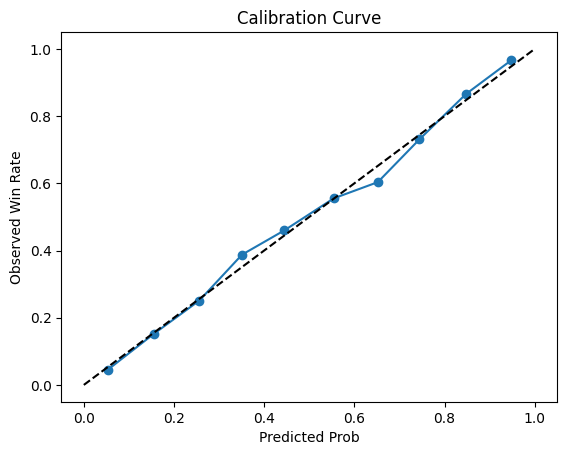

In [ ]:
from sklearn.calibration import calibration_curve
from matplotlib import pyplot as plt

prob_true, prob_pred = calibration_curve(y_test, p_test, n_bins=10)
plt.plot(prob_pred, prob_true, "o-")
plt.plot([0,1],[0,1],"k--")
plt.xlabel("Predicted Prob")
plt.ylabel("Observed Win Rate")
plt.title("Calibration Curve")
plt.show()


Our XGBoost model, tuned via early stopping at ~104 trees, achieves an AUC of 0.737 on out-of-sample games—significantly beating a seed-only baseline (AUC≈0.656). Calibration diagnostics show our predicted probabilities align well with observed outcomes, though slight overconfidence remains for very heavy favorites. Cross-season validation yields a stable ~64.7% average accuracy, highlighting both the promise and limitations of box-score features alone. Seed differential, win-rate differential, and point-margin differential emerge as the most important predictors. To further boost performance, incorporating advanced metrics (e.g. efficiency ratings) or model ensembling would be promising next steps.